In [1]:
from utils.postprocess import postprocess
from utils.preprocess import create_paired_datasets, create_evaluation_dataset, create_unpaired_datasets
from utils.postprocess import postprocess
import matplotlib.pyplot as plt 
import torch
import numpy as np

/Users/sho/anaconda3/envs/fyp/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [2]:
dataset_path = "/Users/sho/Monash/FYP/final_year_project/Data/Synthetic_images/"

In [3]:
# Distribution of Preprocessed Image and Distribution of Postprocessed Image must be returned the same distribution.
def create_hist(image):
    postprocessed_image = postprocess(image)
    postprocessed_image = torch.tensor(postprocessed_image)
    postprocessed_image = np.transpose(postprocessed_image, axes=[2, 0, 1])
    p = postprocessed_image.flatten()
    n = image.flatten()
    fig, axs = plt.subplots(2, 1, figsize=(6, 8))
    axs[0].hist(n)
    axs[0].set_title("Distribution of Preprocessed Image")
    axs[1].hist(p)
    axs[1].set_title("Distribution of Postprocessed Image")
    plt.tight_layout()
    plt.show()

In [4]:
def plot_images(noisy, gt):
    print('-----------------------------------')
    print(noisy.size())
    noisy_np = noisy.numpy()
    noisy_np = np.transpose(noisy_np, (1, 2, 0))
    plt.imshow(noisy_np)
    plt.show()
    print('-----------------------------------')
    print(gt.size())
    gt_np = gt.numpy()
    gt_np = np.transpose(gt_np, (1, 2, 0))
    plt.imshow(gt_np)
    plt.show()

# Test for create_evaluation_dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-----------------------------------
torch.Size([3, 330, 440])


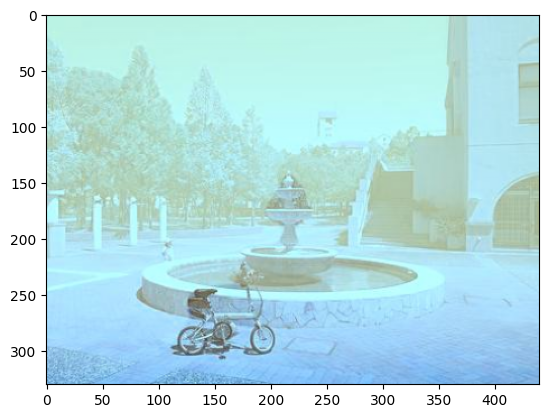

-----------------------------------
torch.Size([3, 330, 440])


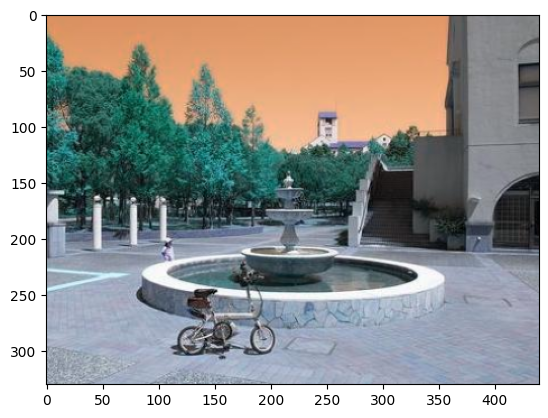

In [5]:
evaluation_dataset = create_evaluation_dataset(dataset_path)
sample = evaluation_dataset[0]
noisy = sample[0]
gt = sample[1]
plot_images(noisy, gt)

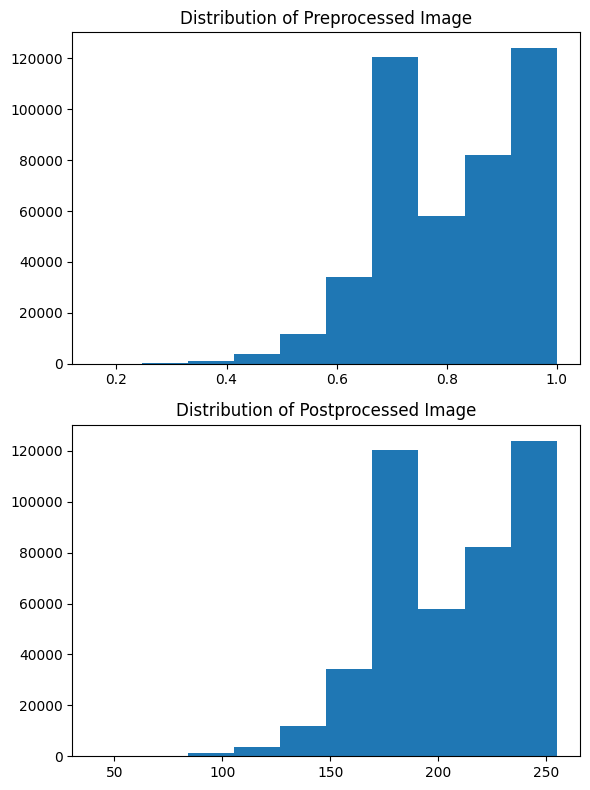

In [6]:
create_hist(noisy)

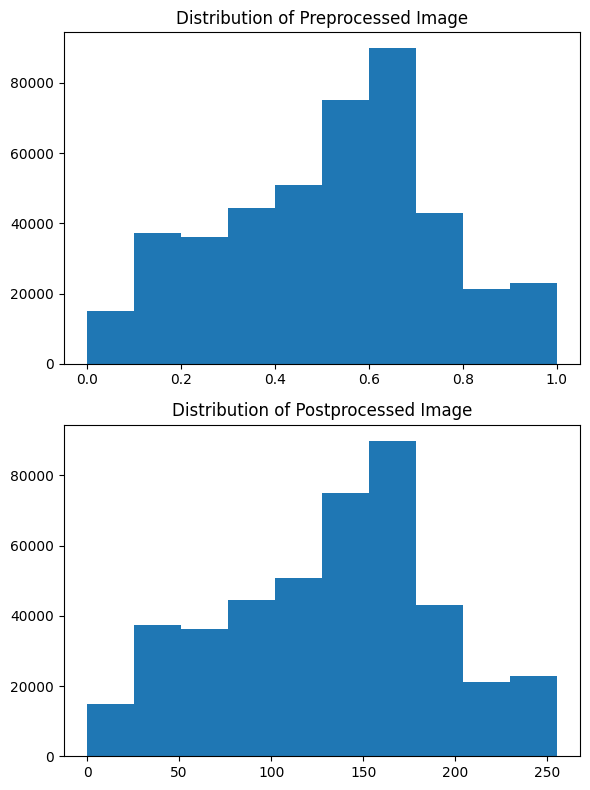

In [7]:
create_hist(gt)

# Test for create_paired_datasets

-----------------------------------
torch.Size([3, 330, 440])


/Users/sho/anaconda3/envs/fyp/lib/python3.10/site-packages/torchvision/transforms/v2/functional/_deprecated.py:12: UserWarning: The function `to_tensor(...)` is deprecated and will be removed in a future release. Instead, please use `to_image(...)` followed by `to_dtype(..., dtype=torch.float32, scale=True)`.
  warnings.warn(


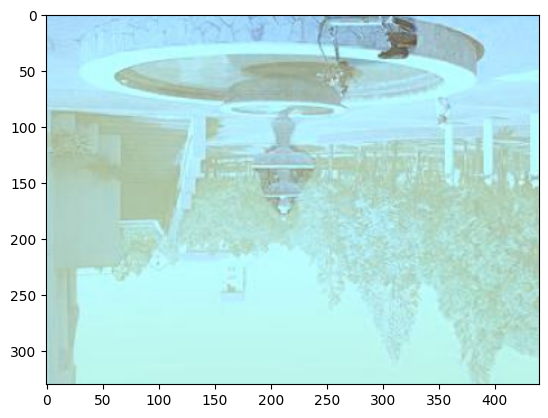

-----------------------------------
torch.Size([3, 330, 440])


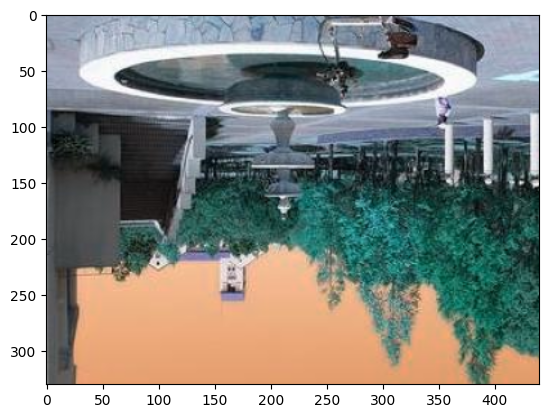

In [8]:
paired_dataset = create_paired_datasets(dataset_path)
sample = paired_dataset[0][0]
noisy = sample[0]
gt = sample[1]
plot_images(noisy, gt)

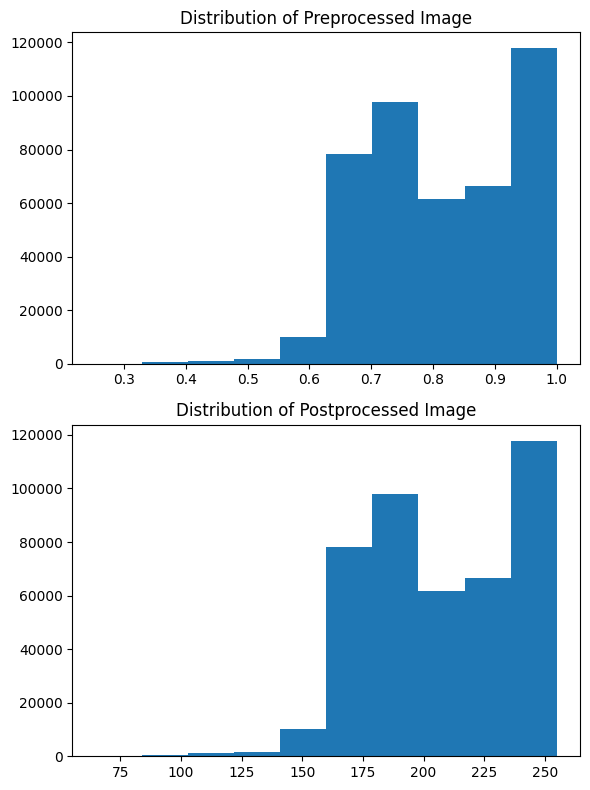

In [9]:
create_hist(noisy)

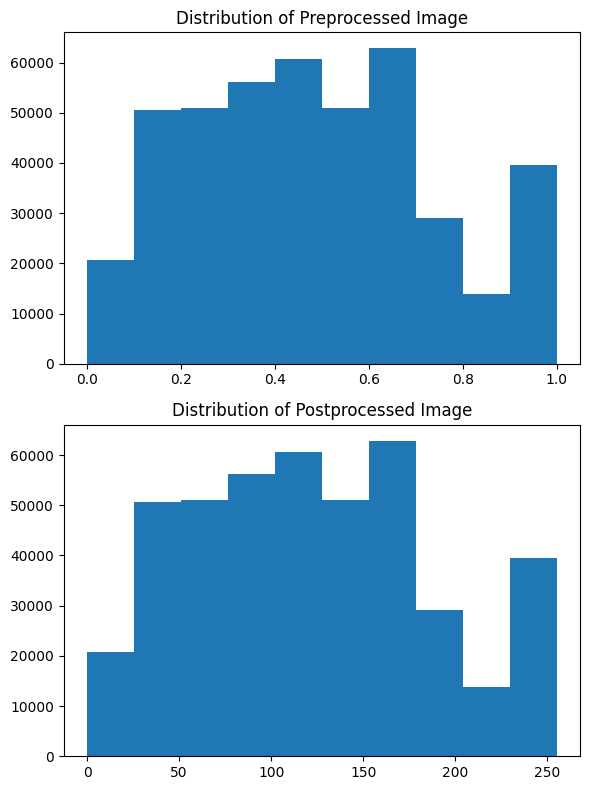

In [10]:
create_hist(gt)

# Test for create_unpaired_datasets

-----------------------------------
torch.Size([3, 330, 440])


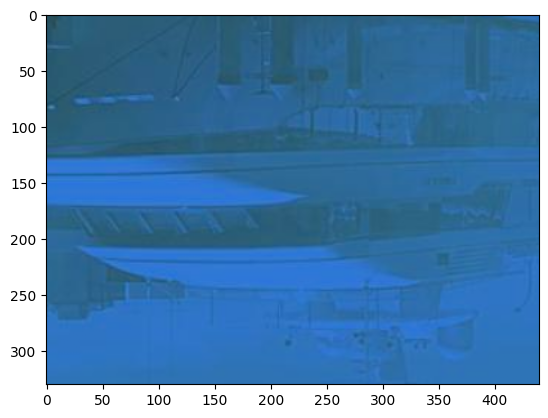

-----------------------------------
torch.Size([3, 330, 440])


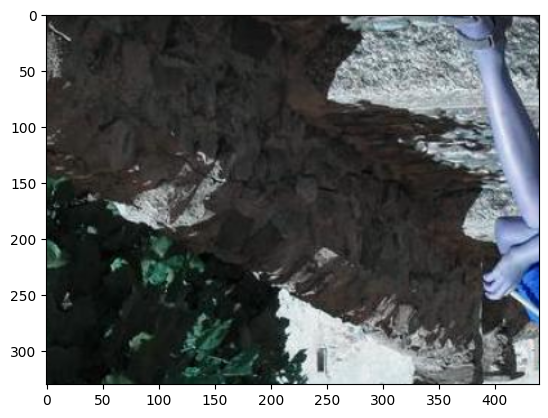

In [12]:
unpaired_dataset = create_unpaired_datasets(dataset_path)
sample = unpaired_dataset[0][0]
noisy = sample[0]
gt = sample[1]
plot_images(noisy, gt)

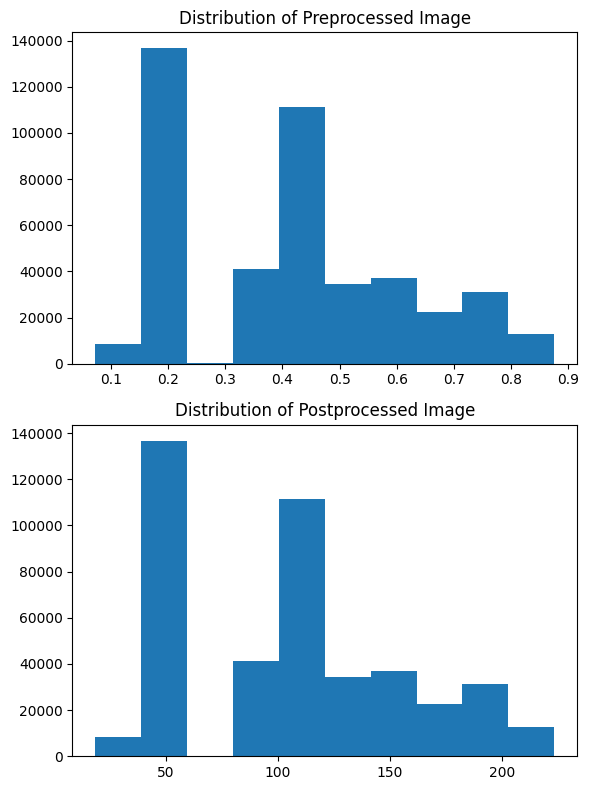

In [13]:
create_hist(noisy)

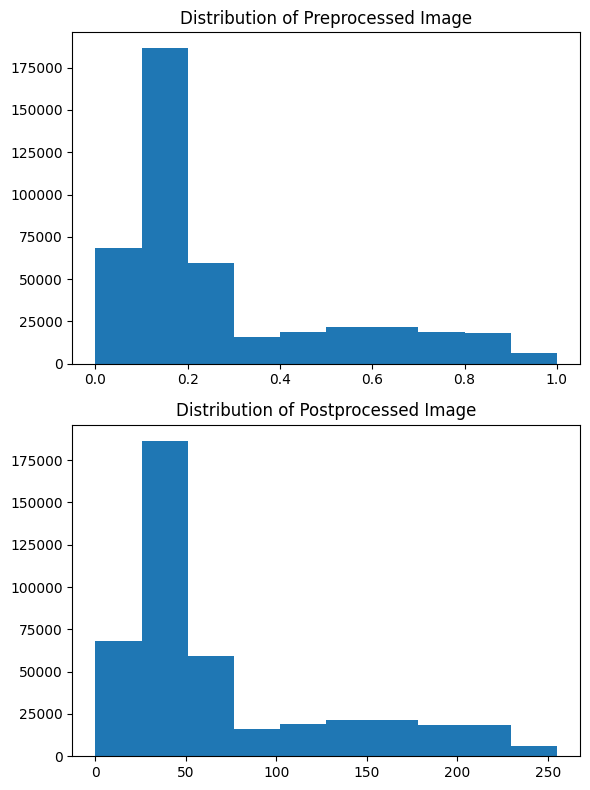

In [14]:
create_hist(gt)